# Riddler Classic - May 22, 2020

https://fivethirtyeight.com/features/somethings-fishy-in-the-state-of-the-riddler/

Ohio is the only state whose name doesn’t share any letters with the word “mackerel.” It’s strange, but it’s true.

But that isn’t the only pairing of a state and a word you can say that about — it’s not even the only fish! Kentucky has “goldfish” to itself, Montana has “jellyfish” and Delaware has “monkfish,” just to name a few.

What is the longest “mackerel?” That is, what is the longest word that doesn’t share any letters with exactly one state? (If multiple “mackerels” are tied for being the longest, can you find them all?)

Extra credit: Which state has the most “mackerels?” That is, which state has the most words for which it is the only state without any letters in common with those words?

### Load data

In [1]:
import pickle
wordlist = pickle.load(open("../data/word-list.pkl","rb"))
wordlist = [w.decode("utf-8") for w in wordlist]
statelist = pickle.load(open("../data/state-list.pkl","rb"))
statelist = [state.lower() for state in statelist]

In [2]:
print(f"There are {len(wordlist)} total words")
print(f"There are {len(statelist)} total states")

There are 263533 total words
There are 50 total states


### Do some quick dataset checks

In [3]:
import matplotlib.pyplot as plt
plt.style.use("tjb")
import numpy as np


Bad key "axes.color_cycle" on line 26 in
/Users/tburch/.matplotlib/stylelib/tjb.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
mylen = np.vectorize(len)
longest = wordlist[np.argmax(mylen(wordlist))]
print(f"The longest word is {longest}")
length_sorted_words =  list(reversed([x for _,x in sorted(zip(mylen(wordlist),wordlist))]))
print(f"The 5 longest words are {length_sorted_words[0:5]} of lengths {[len(x) for x in length_sorted_words[0:5]]}")

The longest word is pneumonoultramicroscopicsilicovolcanoconiosis
The 5 longest words are ['pneumonoultramicroscopicsilicovolcanoconiosis', 'dichlorodiphenyltrichloroethanes', 'dichlorodiphenyltrichloroethane', 'floccinaucinihilipilifications', 'floccinaucinihilipilification'] of lengths [45, 32, 31, 30, 29]


#### Important quantity is not necessarily word legnth, but number of unique characters in each word

Will help with computation time and problem context, so look at those

In [5]:
# Get Alphabetically sorted unique letters
set_length_sorted_words = { w : "".join(sorted(set(w))) for w in length_sorted_words}
unique_substrings = list(set(set_length_sorted_words.values()))

In [6]:
print(f"There are {len(unique_substrings)} unique substrings")

There are 101137 unique substrings


In [7]:
length_sorted_unique_substrings =  list(reversed([x for _,x in sorted(zip(mylen(unique_substrings),unique_substrings))]))

In [8]:
print(length_sorted_unique_substrings[0])
print(length_sorted_unique_substrings[1])


abcdehilmnoprsty
ceghilmnoprstuy


In [9]:
for key, v in set_length_sorted_words.items():
    if v == length_sorted_unique_substrings[0]: 
        print(f"The most unique characters are {key}, with {len(key)} unique characters")

The most unique characters are phenylthiocarbamides, with 20 unique characters


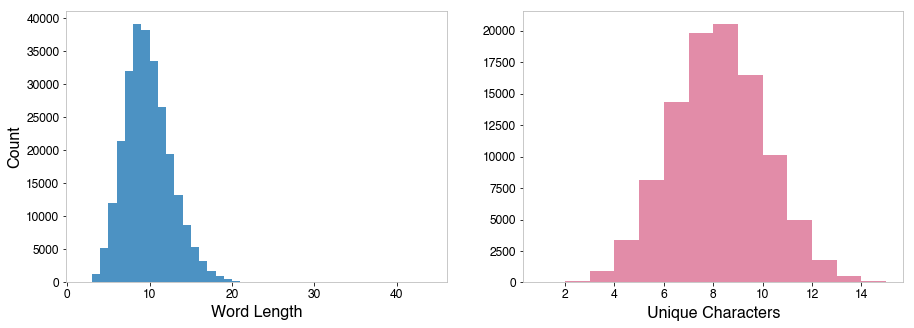

In [10]:
fig, ax_enum = plt.subplots(1,2, figsize=(15,5))
plt.sca(ax_enum[0])
word_lengths = mylen(wordlist)
plt.hist(word_lengths, bins=np.arange(min(word_lengths), max(word_lengths)), alpha=0.8)
plt.ylabel("Count",fontsize=16)
plt.xlabel("Word Length",fontsize=16)
plt.tick_params(labelsize=12)

plt.sca(ax_enum[1])
unique_char_counts = mylen(length_sorted_unique_substrings)
plt.hist(unique_char_counts, bins=np.arange(min(unique_char_counts), max(unique_char_counts)),
         color="#DB7093", alpha=0.8)
plt.xlabel("Unique Characters",fontsize=16)
plt.tick_params(labelsize=12)



plt.savefig("../plots/count_distribution",bbox_params="tight")

### Define checking function

In [11]:
def check_word_against_states(word):
    """ Checks word against all states to see if it passes the question criteria, sharing letters with exactly one
    word (str) : word to evaluate
    returns (str) : None if fails criteria, the one orthogonally spelled state if meets criteria
    
    Note : This could be sped up if we only looked at unique characters, but it's not slow as-is.
    """
    word = word.lower()
    theword = None
    thestate = None
    unshared_char_states = 0
    for state in statelist:
        state= state.lower()
        i = set(state)
        j = set(word)
        matching = i&j
        if len(matching) == 0:
            unshared_char_states += 1
            theword = word
            thestate = state
        if unshared_char_states > 1:
            return None
    if unshared_char_states == 1:
        return thestate
    else:
        return None

In [12]:
# Test
def test_checking_function(word):
    state = check_word_against_states(word)
    if state is None:
        print(f"{word} failed")
    else:
        print(f"Word: {word}   State: {state}")
    
print("-----Should Pass-----")
test_checking_function("monkfish")
test_checking_function("jellyfish")
test_checking_function("mackerel")
test_checking_function("unwatched")
test_checking_function("elephant")
test_checking_function("james")

print("-----Should Fail-----")
test_checking_function("tyler")
test_checking_function("physics")
test_checking_function("four")

-----Should Pass-----
Word: monkfish   State: delaware
Word: jellyfish   State: montana
Word: mackerel   State: ohio
Word: unwatched   State: mississippi
Word: elephant   State: missouri
Word: james   State: ohio
-----Should Fail-----
tyler failed
physics failed
four failed


### Run solution

We'll start with the longest word and continue down the sorted list until we find the length of the longest word that meets the criteria

In [13]:
%%time
for word in length_sorted_words:
    state = check_word_against_states(word)
    if state is not None:
        print(f"Word: {word}  State: {state}")
        print(f"length of longest word {len(word)}  ")
        maximum_matching_length = len(word)
        break

Word: hydrochlorofluorocarbon  State: mississippi
length of longest word 23  
CPU times: user 7.43 ms, sys: 539 µs, total: 7.97 ms
Wall time: 8.45 ms


Next, we need to find all the words of the same length that meet the criteria

In [14]:
correct_length_words = np.array(wordlist)[mylen(wordlist) == maximum_matching_length]
for word in correct_length_words:
    state = check_word_against_states(word)
    if state is not None:
        print(f"Word: {word}  State: {state}")

Word: counterproductivenesses  State: alabama
Word: hydrochlorofluorocarbon  State: mississippi


### Solution:

There are **2** words of length **23** who don't share letters with _exactly_ one state. The two words are:

- **counterproductivenesses** which doesn't share letters with **Alabama**
- **hydrochlorofluorocarbon** which doesn't share letters with **Mississippi**

## Exhaustive solution

Since the computation time is working well, how many words of each length meet the solution criteria?

In [15]:
%%time
len_match_criteria = []
successful_words = []
state_list = []
for word in length_sorted_words:
    state = check_word_against_states(word)
    if state is not None:
        len_match_criteria.append(len(word))
        successful_words.append(word)
        state_list.append(state)

CPU times: user 16.6 s, sys: 52.3 ms, total: 16.6 s
Wall time: 16.8 s


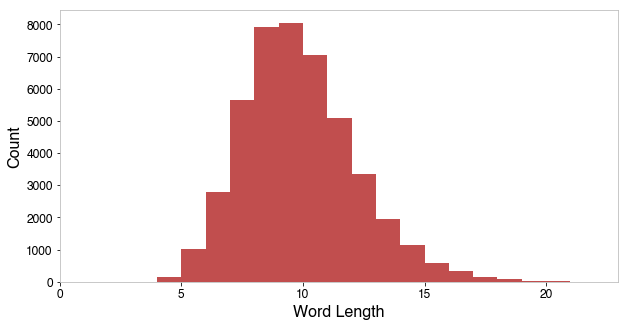

In [16]:
plt.figure(figsize=(10,5))
plt.hist(len_match_criteria, bins=np.arange(min(len_match_criteria), max(len_match_criteria)), color="firebrick", alpha=0.8)
plt.ylabel("Count",fontsize=16)
plt.xlabel("Word Length",fontsize=16)
plt.xticks(np.arange(0,25,5))
plt.tick_params(labelsize=12)
plt.savefig("../plots/passing_distribution",bbox_params="tight")

In [17]:
print("--- Mean ---")
print(f"All: {np.mean(word_lengths):.2f}")
print(f"Passing: {np.mean(len_match_criteria):.2f}")

print("--- Median ---")
print(f"All: {np.median(word_lengths):.2f}")
print(f"Passing: {np.median(len_match_criteria):.2f}")

print("--- Standard Deviation ---")
print(f"All: {np.std(word_lengths):.2f}")
print(f"Passing: {np.std(len_match_criteria):.2f}")

--- Mean ---
All: 9.31
Passing: 9.37
--- Median ---
All: 9.00
Passing: 9.00
--- Standard Deviation ---
All: 2.84
Passing: 2.33


## Extra Credit

Extra credit: Which state has the most “mackerels?” That is, which state has the most words for which it is the only state without any letters in common with those words?

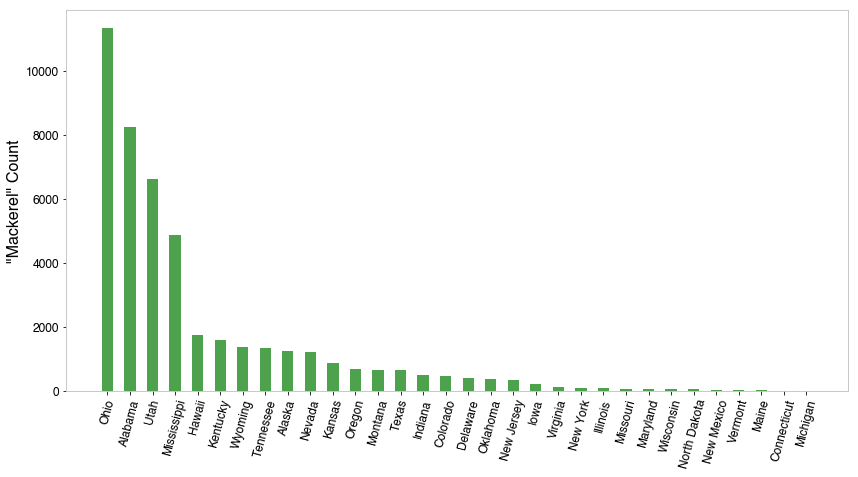

In [18]:
import pandas as pd
state_list_cap = [s.title() for s in state_list]
df = pd.DataFrame({'states': state_list_cap})
df['num'] = 1 # placeholder for summing
df = df.groupby('states').sum().sort_values('num', ascending=False)

plt.figure(figsize=(14,7))
plt.bar(df.index, df.num, width=0.5, color='forestgreen', alpha=0.8)
#plt.hist(state_list, bins=np.arange(min(len_match_criteria), max(len_match_criteria)), color="forestgreen", alpha=0.8)
plt.ylabel("\"Mackerel\" Count",fontsize=16)
plt.xticks(rotation=75, fontsize=12)
plt.tick_params(labelsize=12)
plt.savefig("../plots/states_distribution",bbox_params="tight")

### Full list

Just to check the raw counts

In [19]:
df

,num
states,
Ohio,11342
Alabama,8274
Utah,6619
Mississippi,4863
Hawaii,1763
Kentucky,1580
Wyoming,1364
Tennessee,1339
Alaska,1261


### Plot number of unique characters in a state v number of "mackerels"

In [20]:
df["lower_state"] = df.index.str.lower()
df["unique_chars"] = df["lower_state"].apply(list).apply(set).apply(len)

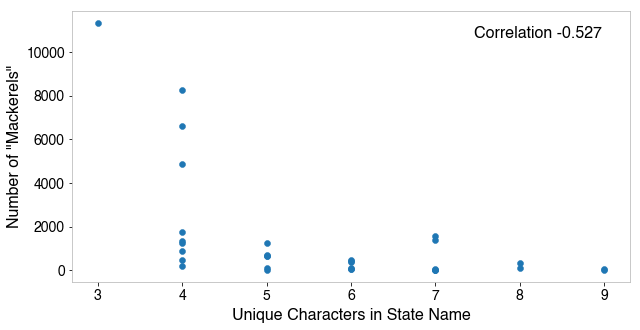

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(df["unique_chars"], df["num"])
correlation = np.corrcoef(df["unique_chars"], df["num"])[0,1]
plt.annotate(f"Correlation {correlation:.3f}", xy=(0.95,0.9), xycoords="axes fraction", ha="right", fontsize=16)

plt.xlabel("Unique Characters in State Name",fontsize=16)
plt.ylabel("Number of \"Mackerels\"",fontsize=16)
plt.tick_params(labelsize=14)
plt.savefig("../plots/scatter_state",bbox_params="tight")